In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Membaca dataset dari file CSV
dataset = pd.read_csv('dataset_iotpond_1_bersih.csv', parse_dates=["created_at"], index_col="created_at")
dataset.head(10)

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
created_at,,,,,,,,
2021-06-19 00:00:00,24.617541,100.0,4.734238,8.430745,0.458420,1.925829,7.11,2.91
2021-06-19 06:00:00,24.652806,100.0,5.015519,8.401315,0.458420,2.004167,7.11,2.91
2021-06-19 12:00:00,26.271899,100.0,7.302248,8.385208,0.458099,2.075716,7.11,2.91
2021-06-19 18:00:00,26.149711,100.0,7.735084,8.399212,0.458420,2.068999,7.11,2.91
2021-06-20 00:00:00,25.686950,100.0,6.765306,8.405993,0.458420,1.904390,7.50,3.85
2021-06-20 06:00:00,25.407630,100.0,6.099134,8.403096,0.458420,1.852247,7.50,3.85
2021-06-20 12:00:00,26.428867,100.0,7.175465,8.375284,0.458420,1.802680,7.50,3.85
2021-06-20 18:00:00,26.223045,100.0,7.682010,8.391571,0.458420,1.826633,7.50,3.85
2021-06-21 00:00:00,25.634234,100.0,6.683789,8.405592,0.458420,1.709189,7.89,4.79


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2021-06-19 00:00:00 to 2021-08-19 18:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       246 non-null    float64
 1   turbidity  246 non-null    float64
 2   oxygen     246 non-null    float64
 3   ph         246 non-null    float64
 4   ammonia    246 non-null    float64
 5   nitrat     246 non-null    float64
 6   length     246 non-null    float64
 7   weight     246 non-null    float64
dtypes: float64(8)
memory usage: 17.3 KB


In [4]:
dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,24.677894,92.287586,4.673793,7.536264,0.502585,3.799064,16.053155,40.130289
std,0.678051,21.003334,1.388945,0.390648,0.114799,3.118887,4.547371,25.107130
min,23.101813,1.575758,1.110682,7.021365,0.179406,1.152872,7.110000,2.910000
25%,24.190428,94.988083,4.109107,7.258890,0.458420,1.452085,12.914856,16.921083
50%,24.618316,100.000000,4.655675,7.440366,0.458428,1.768416,16.190000,36.060000
75%,25.105386,100.000000,5.379137,7.694452,0.506111,6.089982,19.895000,65.650000
max,26.428867,100.000000,8.239512,8.430745,0.942791,12.135710,23.170128,85.890000


In [5]:
# Menentukan apakah ada nilai kosong dalam dataset
ada_nilai_kosong = dataset.isnull().values.any()

if ada_nilai_kosong:
    print("Dataset memiliki nilai kosong.")
    
    # Mencari lokasi kosong berdasarkan kolom
    kolom_kosong = dataset.columns[dataset.isnull().any()].tolist()
    print("Kolom yang memiliki nilai kosong:", kolom_kosong)
    
    # Mencari lokasi kosong berdasarkan baris
    baris_kosong = dataset[dataset.isnull().any(axis=1)]
    print("Baris yang memiliki nilai kosong:\n", baris_kosong)
else:
    print("Dataset tidak memiliki nilai kosong.")

Dataset tidak memiliki nilai kosong.


<Axes: xlabel='created_at'>

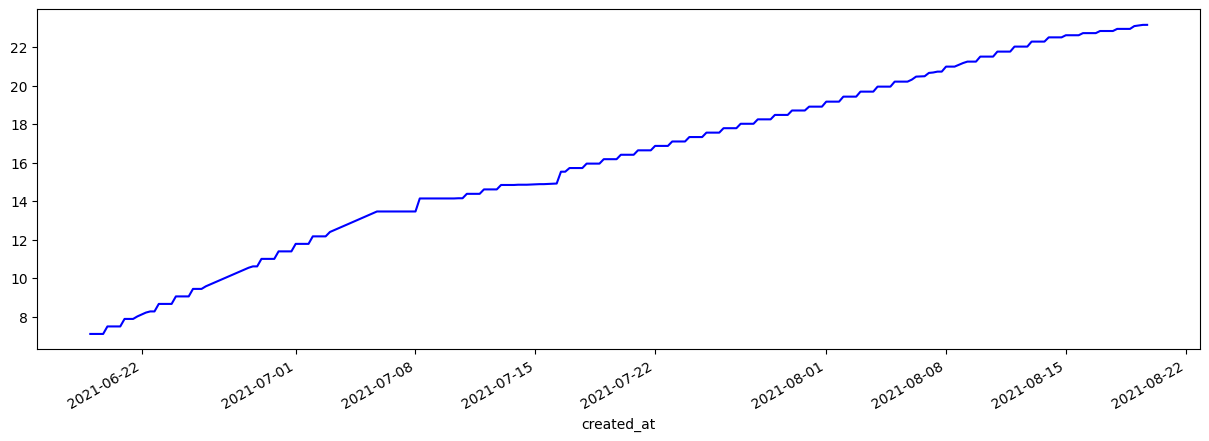

In [6]:
dataset.length.plot(figsize=(15,5), color="b")

<Axes: xlabel='created_at'>

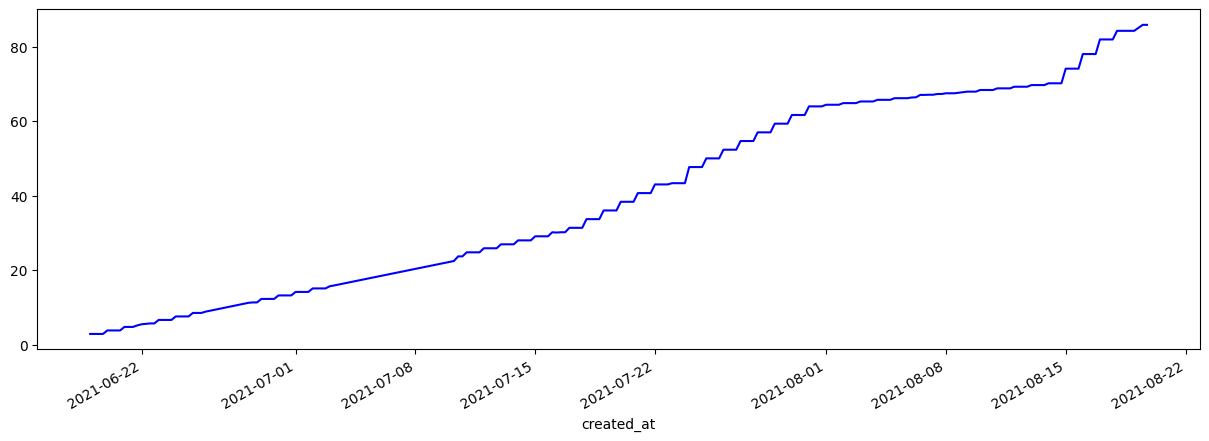

In [7]:
dataset.weight.plot(figsize=(15,5), color="b")

In [8]:
day_dataset = dataset.resample('D', level=0).max()

In [9]:
# Menghitung perbedaan antara nilai length pada hari ini dengan hari kemarin
day_dataset['delta_length'] = day_dataset['length'] - day_dataset['length'].shift(1)

# Menghitung perbedaan antara nilai weight pada hari ini dengan hari kemarin
day_dataset['delta_weight'] = day_dataset['weight'] - day_dataset['weight'].shift(1)

# Menghapus baris pertama yang memiliki nilai NaN setelah menghitung perbedaan
day_dataset_1 = day_dataset.dropna()

# Menampilkan dataset yang telah ditambahkan fitur baru
print(day_dataset_1)

                 temp  turbidity    oxygen        ph   ammonia     nitrat   
created_at                                                                  
2021-06-20  26.428867      100.0  7.682010  8.405993  0.458420   1.904390  \
2021-06-21  25.634234      100.0  7.313036  8.405761  0.458420   1.741131   
2021-06-22  25.305118      100.0  7.913807  8.397478  0.458420   1.604300   
2021-06-23  24.745377      100.0  6.517417  8.342940  0.458420   1.552196   
2021-06-24  25.040506      100.0  7.564376  8.270267  0.458423   1.651496   
...               ...        ...       ...       ...       ...        ...   
2021-08-15  25.073589      100.0  5.501269  7.089003  0.891933  10.216935   
2021-08-16  24.617021      100.0  2.894809  7.073983  0.816068   9.301458   
2021-08-17  24.005208      100.0  3.403752  7.073788  0.841106   9.745545   
2021-08-18  24.601562      100.0  3.257030  7.071809  0.695657  11.370000   
2021-08-19  24.376117      100.0  2.441093  7.046139  0.650479   9.367943   

In [10]:
day_dataset_1.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,delta_length,delta_weight
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,25.028923,94.427534,5.284314,7.537379,0.547817,4.301072,16.276362,41.130578,0.263281,1.360328
std,0.609937,17.420402,1.332400,0.387252,0.138852,3.547950,4.456350,25.071415,0.141022,0.987323
min,23.689709,9.612737,1.515278,7.046139,0.441510,1.265950,7.500000,3.850000,-0.000100,0.192100
25%,24.619092,100.000000,4.648036,7.266044,0.458427,1.550632,13.472900,18.268018,0.230000,0.574264
50%,24.899175,100.000000,5.028577,7.452746,0.459282,1.869143,16.420000,38.390000,0.239643,0.940679
75%,25.422089,100.000000,5.836894,7.661899,0.611357,7.351059,19.960000,65.760000,0.385740,2.314400
max,26.428867,100.000000,8.239512,8.405993,0.942791,12.135710,23.170128,85.890000,0.676400,4.330000


<Axes: xlabel='created_at'>

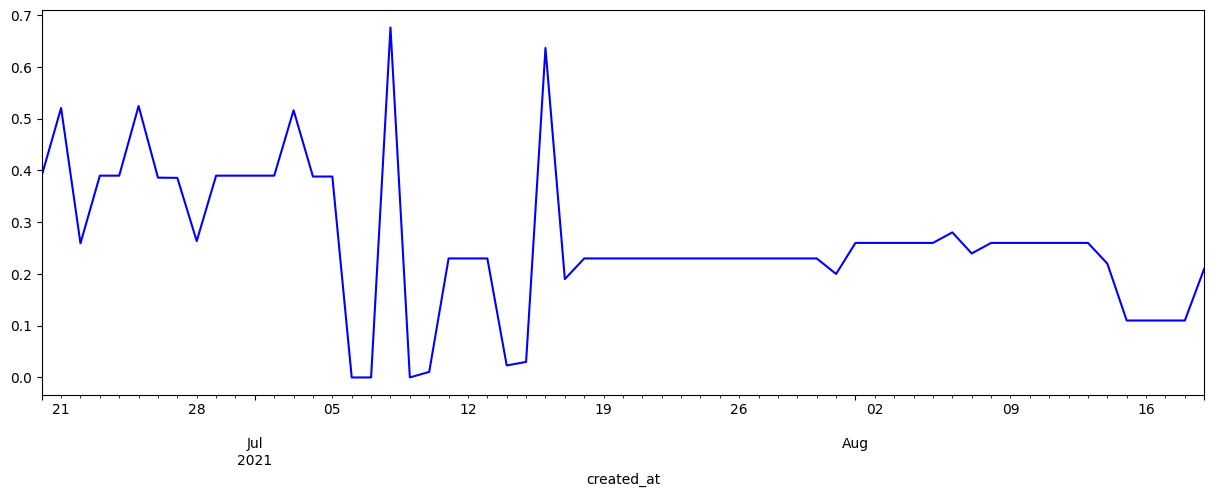

In [11]:
day_dataset_1.delta_length.plot(figsize=(15,5), color="b")

In [14]:
# Mencari kolom mana yang memiliki nilai negatif
# Menentukan kolom yang ingin diperiksa
kolom_target = ['delta_length']  # Ganti 'nama_kolom' dengan nama kolom yang ingin diperiksa

# Menghitung jumlah nilai negatif pada kolom tertentu
jumlah_negatif = len(day_dataset_1[day_dataset_1[kolom_target] < 0])

# Menampilkan hasil
print("Jumlah nilai negatif pada kolom", kolom_target, "adalah", jumlah_negatif)

Jumlah nilai negatif pada kolom ['delta_length'] adalah 61


In [15]:
# Menghapus baris yang memiliki nilai negatif
# Mengidentifikasi baris-baris dengan nilai negatif
baris_negatif = day_dataset_1[day_dataset_1 < 0].any(axis=1)

# Menghapus baris-baris dengan nilai negatif
dataset_clean = day_dataset_1[~baris_negatif]

# Menampilkan dataset setelah penghapusan baris-baris dengan nilai negatif
print(dataset_clean)

                 temp   turbidity    oxygen        ph   ammonia     nitrat   
created_at                                                                   
2021-06-20  26.428867  100.000000  7.682010  8.405993  0.458420   1.904390  \
2021-06-21  25.634234  100.000000  7.313036  8.405761  0.458420   1.741131   
2021-06-22  25.305118  100.000000  7.913807  8.397478  0.458420   1.604300   
2021-06-23  24.745377  100.000000  6.517417  8.342940  0.458420   1.552196   
2021-06-24  25.040506  100.000000  7.564376  8.270267  0.458423   1.651496   
2021-06-25  25.577215  100.000000  8.087585  8.259832  0.458420   1.490209   
2021-06-26  25.648059  100.000000  6.180976  8.253563  0.458420   1.355957   
2021-06-27  25.720700  100.000000  6.115386  8.228693  0.458421   1.265950   
2021-06-28  25.757020  100.000000  8.239512  8.203826  0.458427   1.341751   
2021-06-29  24.803217  100.000000  5.616009  7.939960  0.458446   1.339959   
2021-06-30  25.148776  100.000000  5.243981  7.896255  0.458877 

In [16]:
dataset_clean.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,delta_length,delta_weight
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,25.025376,94.334660,5.294918,7.536087,0.549307,4.348242,16.323086,41.496004,0.267670,1.367383
std,0.614450,17.552176,1.341046,0.390387,0.139531,3.558550,4.478863,25.118637,0.137946,0.994103
min,23.689709,9.612737,1.515278,7.046139,0.441510,1.265950,7.500000,3.850000,0.000000,0.192100
25%,24.618574,99.595838,4.645346,7.261448,0.458427,1.551805,13.375856,18.033769,0.230000,0.562631
50%,24.895402,100.000000,5.087770,7.446635,0.459285,1.886766,16.535000,39.555000,0.249435,0.945573
75%,25.453109,100.000000,5.894502,7.673747,0.619886,7.674374,20.025000,65.870000,0.385836,2.318300
max,26.428867,100.000000,8.239512,8.405993,0.942791,12.135710,23.170128,85.890000,0.676400,4.330000


In [17]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2021-06-20 to 2021-08-19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          60 non-null     float64
 1   turbidity     60 non-null     float64
 2   oxygen        60 non-null     float64
 3   ph            60 non-null     float64
 4   ammonia       60 non-null     float64
 5   nitrat        60 non-null     float64
 6   length        60 non-null     float64
 7   weight        60 non-null     float64
 8   delta_length  60 non-null     float64
 9   delta_weight  60 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB


<Axes: xlabel='created_at'>

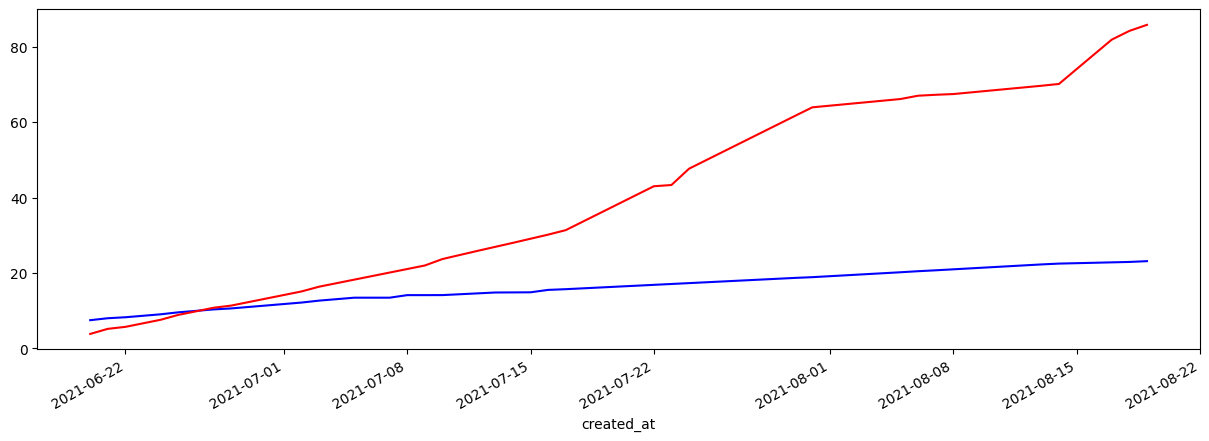

In [18]:
dataset_clean.length.plot(figsize=(15,5), color="b")
dataset_clean.weight.plot(figsize=(15,5), color="r")

In [19]:
# Menghitung pakan harian berdasarkan kolom "length" dan "weight"
# berdasarkan penjelasan jurnal pada dataset 
# Pemberian pakan dilakukan sebanyak 7% dari berat tubuh ikan dalam dua kali pemberian
dataset_clean['feed_day'] = (dataset_clean['weight']) * 0.07*2

# Menampilkan dataset dengan kolom baru "feed_day"
print(dataset_clean)

                 temp   turbidity    oxygen        ph   ammonia     nitrat   
created_at                                                                   
2021-06-20  26.428867  100.000000  7.682010  8.405993  0.458420   1.904390  \
2021-06-21  25.634234  100.000000  7.313036  8.405761  0.458420   1.741131   
2021-06-22  25.305118  100.000000  7.913807  8.397478  0.458420   1.604300   
2021-06-23  24.745377  100.000000  6.517417  8.342940  0.458420   1.552196   
2021-06-24  25.040506  100.000000  7.564376  8.270267  0.458423   1.651496   
2021-06-25  25.577215  100.000000  8.087585  8.259832  0.458420   1.490209   
2021-06-26  25.648059  100.000000  6.180976  8.253563  0.458420   1.355957   
2021-06-27  25.720700  100.000000  6.115386  8.228693  0.458421   1.265950   
2021-06-28  25.757020  100.000000  8.239512  8.203826  0.458427   1.341751   
2021-06-29  24.803217  100.000000  5.616009  7.939960  0.458446   1.339959   
2021-06-30  25.148776  100.000000  5.243981  7.896255  0.458877 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_13692\3359727111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['feed_day'] = (dataset_clean['weight']) * 0.07*2


In [20]:
# Menghitung akumulasi pakan harian (feed_day)
dataset_clean['feed_akum'] = dataset_clean['feed_day'].cumsum()

# Menampilkan dataset dengan kolom baru "feed_day"
print(dataset_clean)

                 temp   turbidity    oxygen        ph   ammonia     nitrat   
created_at                                                                   
2021-06-20  26.428867  100.000000  7.682010  8.405993  0.458420   1.904390  \
2021-06-21  25.634234  100.000000  7.313036  8.405761  0.458420   1.741131   
2021-06-22  25.305118  100.000000  7.913807  8.397478  0.458420   1.604300   
2021-06-23  24.745377  100.000000  6.517417  8.342940  0.458420   1.552196   
2021-06-24  25.040506  100.000000  7.564376  8.270267  0.458423   1.651496   
2021-06-25  25.577215  100.000000  8.087585  8.259832  0.458420   1.490209   
2021-06-26  25.648059  100.000000  6.180976  8.253563  0.458420   1.355957   
2021-06-27  25.720700  100.000000  6.115386  8.228693  0.458421   1.265950   
2021-06-28  25.757020  100.000000  8.239512  8.203826  0.458427   1.341751   
2021-06-29  24.803217  100.000000  5.616009  7.939960  0.458446   1.339959   
2021-06-30  25.148776  100.000000  5.243981  7.896255  0.458877 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_13692\4166353086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['feed_akum'] = dataset_clean['feed_day'].cumsum()


In [21]:
# Membuat kolom baru "day"
dataset_clean['day'] = range(1, len(dataset_clean) + 1)

# Menampilkan dataset dengan kolom baru "day"
print(dataset_clean)

                 temp   turbidity    oxygen        ph   ammonia     nitrat   
created_at                                                                   
2021-06-20  26.428867  100.000000  7.682010  8.405993  0.458420   1.904390  \
2021-06-21  25.634234  100.000000  7.313036  8.405761  0.458420   1.741131   
2021-06-22  25.305118  100.000000  7.913807  8.397478  0.458420   1.604300   
2021-06-23  24.745377  100.000000  6.517417  8.342940  0.458420   1.552196   
2021-06-24  25.040506  100.000000  7.564376  8.270267  0.458423   1.651496   
2021-06-25  25.577215  100.000000  8.087585  8.259832  0.458420   1.490209   
2021-06-26  25.648059  100.000000  6.180976  8.253563  0.458420   1.355957   
2021-06-27  25.720700  100.000000  6.115386  8.228693  0.458421   1.265950   
2021-06-28  25.757020  100.000000  8.239512  8.203826  0.458427   1.341751   
2021-06-29  24.803217  100.000000  5.616009  7.939960  0.458446   1.339959   
2021-06-30  25.148776  100.000000  5.243981  7.896255  0.458877 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_13692\2049194015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['day'] = range(1, len(dataset_clean) + 1)


In [22]:
dataset_clean.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,delta_length,delta_weight,feed_day,feed_akum,day
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,25.025376,94.334660,5.294918,7.536087,0.549307,4.348242,16.323086,41.496004,0.267670,1.367383,5.809441,117.385964,30.500000
std,0.614450,17.552176,1.341046,0.390387,0.139531,3.558550,4.478863,25.118637,0.137946,0.994103,3.516609,106.524285,17.464249
min,23.689709,9.612737,1.515278,7.046139,0.441510,1.265950,7.500000,3.850000,0.000000,0.192100,0.539000,0.539000,1.000000
25%,24.618574,99.595838,4.645346,7.261448,0.458427,1.551805,13.375856,18.033769,0.230000,0.562631,2.524728,24.119744,15.750000
50%,24.895402,100.000000,5.087770,7.446635,0.459285,1.886766,16.535000,39.555000,0.249435,0.945573,5.537700,82.434511,30.500000
75%,25.453109,100.000000,5.894502,7.673747,0.619886,7.674374,20.025000,65.870000,0.385836,2.318300,9.221800,198.724111,45.250000
max,26.428867,100.000000,8.239512,8.405993,0.942791,12.135710,23.170128,85.890000,0.676400,4.330000,12.024600,348.566433,60.000000


In [23]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2021-06-20 to 2021-08-19
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          60 non-null     float64
 1   turbidity     60 non-null     float64
 2   oxygen        60 non-null     float64
 3   ph            60 non-null     float64
 4   ammonia       60 non-null     float64
 5   nitrat        60 non-null     float64
 6   length        60 non-null     float64
 7   weight        60 non-null     float64
 8   delta_length  60 non-null     float64
 9   delta_weight  60 non-null     float64
 10  feed_day      60 non-null     float64
 11  feed_akum     60 non-null     float64
 12  day           60 non-null     int64  
dtypes: float64(12), int64(1)
memory usage: 6.6 KB


In [24]:
# Mencoba membuat model regresi
# Menentukan fitur (X) dan target (y)
features = ['weight']
target = ['feed_akum','day']
X_lr = dataset_clean[features]
y_lr = dataset_clean[target]

# Membuat dan melatih model regresi linear
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)

LinearRegression()

In [25]:
# Mencoba prediksi
# Memasukkan parameter baru untuk prediksi
new_data_lr = np.array([[240.0]])  # Ganti dengan parameter yang diinginkan
prediction_lr = model_lr.predict(new_data_lr)

print("Prediksi total pakan yang dibutuhkan (feed_day) dan hari (day):", prediction_lr)

Prediksi total pakan yang dibutuhkan (feed_day) dan hari (day): [[925.24035816 167.16705224]]


e:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
